# Business Understanding

## Introduction

In the hospitality industry, especially hotels, overbooking is a common strategy to handle booking cancellations. With the rise of online platforms, it has become easier for customers to make and cancel reservations.

Booking cancellations can significantly impact hotel operations. While they can help maximize revenue through overbooking, they also pose a risk to the hotel’s reputation if not managed properly. Therefore, if hotels can predict cancellations in advance, they can better optimize their overbooking strategies and minimize potential risks.

## Problem Statement

Overbooking strategies work best when we can estimate how many bookings are likely to be canceled. If we underestimate cancellations, more rooms may end up empty and unused. But if we overestimate cancellations, we risk having too many guests and not enough rooms, which can lead to customer dissatisfaction due to overbooking.

That’s why accurate cancellation prediction is key to balancing occupancy and guest satisfaction.

## Project Goals

Based on the problem statement, the goal is to accurately predict whether a booking will be canceled or not. This helps in making better decisions and supports the overbooking strategy.

We may also discover certain booking characteristics that are strongly linked to cancellations, which can help identify which reservations are more likely to be canceled.

## Analytical Approach

Based on the problem statement, the goal is to accurately predict whether a booking will be canceled or not. This helps in making better decisions and supports the overbooking strategy.

We may also discover certain booking characteristics that are strongly linked to cancellations, which can help identify which reservations are more likely to be canceled.

## Evaluation Metrics

Target (y):
- 0 : Not Canceled
- 1 : Canceled

Confusion Matrix:

| Actual/Predicted | Negative (0/Not Canceled) | Positive (1/Canceled) |
| --- | --- | --- |
| Negatif (0) | Actual not canceled, predicted not canceled (True Negative / TN)  | Actual not canceled, predicted canceled (False Positive / FP) |
| Positive (1) | Actual canceled, predicted not canceled (False Negative / FN) | Actual canceled, predicted canceled (True Positive / TP) |


False Negative (FN) : 

The model predicts a guest will show up, but they cancel.

→ The room goes unbooked and empty, even though another guest could have stayed.

False Positive (FP) : 

The model predicts a cancellation, but the guest actually shows up.

→ The hotel becomes overbooked, risking customer dissatisfaction and damaging the hotel’s reputation, the guest may not return in the future.

This is the the research of overbooking and minimize cost strategies

Source: https://oaky.com/en/blog/hotel-overbooking

**Is overbooking a good practice for hotels [Pros and cons of hotel overbooking]**

Pros of hotel overbooking:

- Mitigates the risk of last-minute cancellations and no-shows
- Maximises occupancy
- Prevents revenue losses
- Lets you stay competitive on OTAs

Cons of hotel overbooking:

- Lost revenue opportunities
- Guest dissatisfaction and hotel reputational damage
- Inefficiencies and disruptions in hotel operations



Both types of prediction errors can negatively affect hotel revenue. However, in my opinion, overbooking (False Positive) is more harmful than an empty room (False Negative). Overbooking may lead to long-term revenue loss because dissatisfied guests who experience poor service are less likely to return. This damages the hotel’s reputation, which is a major concern.

While some might argue that overbooking is generally less costly than leaving rooms empty, in reality, overbooking often forces the hotel to cover extra costs, such as transportation or relocation to another hotel.

Therefore, overall, I believe overbooked rooms are more damaging than empty rooms, although both should be minimized.
To address this, I’ll use the F2 Score — a metric that still considers both precision and recall but places more weight on recall, which is more important in this case. I’ll also use ROC AUC Score as a secondary evaluation metric.

# Library & Read

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('hotel_booking_demand.csv').copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


In [4]:
df

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
83568,PRT,Online TA,0,0,No Deposit,0,Contract,A,0,3,1
83569,FRA,Online TA,0,0,No Deposit,0,Transient,D,0,2,0
83570,PRT,Online TA,0,1,No Deposit,0,Transient,D,0,3,0
83571,CN,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0


# Data Understanding

## Attribute Information

| Attribute | Data Type | Description |
| --- | --- | --- |
| country | Object (Text) | Country of origin. Categories are represented in the ISO 3155–3:2013 format. |
| market_segment | Object (Text) | Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”. |
| previous_cancellations | Integer (Number) | Number of previous bookings that were cancelled by the customer prior to the current booking. |
| booking_changes | Integer (Number) | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation. |
| deposit_type | Object (Text) | Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay. |
| days_in_waiting_list | Integer (Number) | Number of days the booking was in the waiting list before it was confirmed to the customer. |
| customer_type | Object (Text) | Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking. |
| reserved_room_type | Object (Text) | Code of room type reserved. Code is presented instead of designation for anonymity reasons. |
| required_car_parking_spaces | Integer (Number) | Number of car parking spaces required by the customer. |
| total_of_special_requests | Integer (Number) | Number of special requests made by the customer (e.g. twin bed or high floor). |
| is_canceled | Integer (Number) | Value indicating if the booking was canceled (1) or not (0). |

Country Codes Alpha-2 & Alpha-3 based on ISO 3166 international standard.

Source: https://www.iban.com/country-codes

# Exploratory Data Analysis (EDA)

In [5]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape[0]} baris dan {df.shape[1]} kolom')

df.info(verbose= True, show_counts=True)

Jumlah baris dan kolom di dataset df adalah 83573 baris dan 11 kolom
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


In [6]:
display(df.describe(), df.describe(include='object'))

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled
count,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000
mean,0.086798,0.220897,2.330561,0.062999,0.573211,0.368277
std,0.841011,0.648635,17.673051,0.246919,0.795163,0.482340
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,26.000000,21.000000,391.000000,8.000000,5.000000,1.000000


,country,market_segment,deposit_type,customer_type,reserved_room_type
count,83222,83573,83573,83573,83573
unique,162,8,3,4,10
top,PRT,Online TA,No Deposit,Transient,A
freq,34097,39460,73352,62732,60041


## Data Distribution

### Categorical features

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Automatically select categorical columns
categorical_cols_eda = df.select_dtypes(include='object').columns
categorical_cols_eda = categorical_cols_eda.drop('country')

C:\Users\rudyc\AppData\Local\Temp\ipykernel_10176\3172476565.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index,palette='tab10')


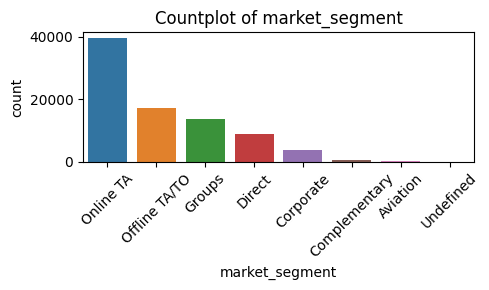

C:\Users\rudyc\AppData\Local\Temp\ipykernel_10176\3172476565.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index,palette='tab10')


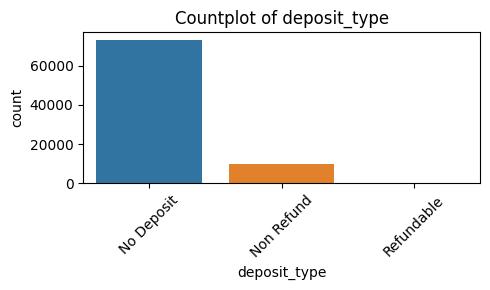

C:\Users\rudyc\AppData\Local\Temp\ipykernel_10176\3172476565.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index,palette='tab10')


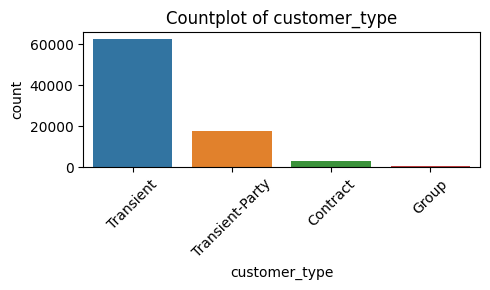

C:\Users\rudyc\AppData\Local\Temp\ipykernel_10176\3172476565.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index,palette='tab10')


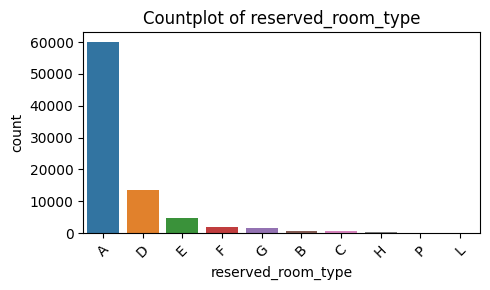

In [8]:
for col in categorical_cols_eda:
    plt.figure(figsize=(5,3))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index,palette='tab10')
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


C:\Users\rudyc\AppData\Local\Temp\ipykernel_10176\1615927902.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


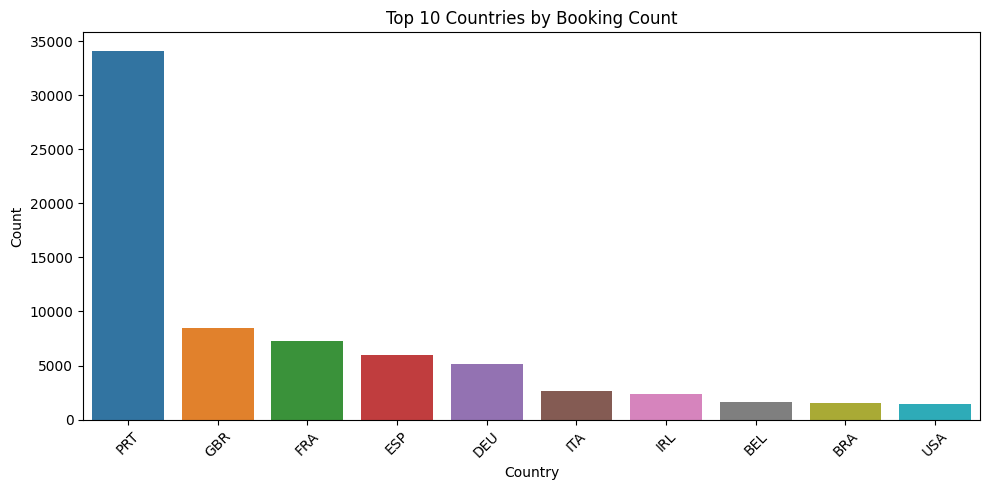

In [9]:
# Group countries outside the top 10 as 'Other'
top10_countries = df['country'].value_counts().nlargest(10).index
df_top10 = df[df['country'].isin(top10_countries)]
# df['country_grouped'] = df['country'].apply(lambda x: x if x in top10_countries else 'Other')

# 3. Create a colorful countplot
plt.figure(figsize=(10, 5))
sns.countplot(
    data=df_top10,
    x='country',
    order=top10_countries,
    palette='tab10'  
)
plt.title('Top 10 Countries by Booking Count')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
# CATEGORY 1
unique_country = df['country'].unique()
print("Unique:\n", unique_country)

cnt_country = df['country'].value_counts()
print("\ncounts:\n", cnt_country)

Unique:
 ['IRL' 'FRA' 'PRT' 'NLD' 'ESP' 'UMI' 'CN' 'LUX' 'BRA' 'BEL' 'JPN' 'DEU'
 'ITA' 'CHE' 'GBR' 'AGO' 'SRB' 'COL' 'CHN' 'SWE' 'AUT' 'CIV' 'CZE' 'POL'
 'USA' 'SGP' 'RUS' 'ROU' 'DNK' 'IND' 'MAR' 'PHL' 'ARG' 'ISL' 'ZAF' 'LBN'
 'MOZ' 'TUR' 'BGD' 'MEX' 'CAF' 'NOR' 'FIN' 'UKR' 'EGY' 'ISR' nan 'KOR'
 'AZE' 'HUN' 'AUS' 'EST' 'CHL' 'SVN' 'PRY' 'ABW' 'ALB' 'LTU' 'ARE' 'HRV'
 'SAU' 'NZL' 'LVA' 'ATA' 'KAZ' 'DZA' 'TWN' 'CRI' 'BIH' 'BGR' 'IRQ' 'OMN'
 'VEN' 'IDN' 'GEO' 'MLT' 'IRN' 'BLR' 'URY' 'LBY' 'TUN' 'BEN' 'MYS' 'MWI'
 'GRC' 'CYP' 'CPV' 'HKG' 'PRI' 'MKD' 'MUS' 'IMN' 'PAN' 'NGA' 'GLP' 'KHM'
 'PER' 'QAT' 'SEN' 'MAC' 'SVK' 'BHR' 'ECU' 'SYC' 'BOL' 'TJK' 'LCA' 'MDV'
 'SYR' 'ZMB' 'LIE' 'THA' 'MNE' 'BRB' 'CMR' 'JEY' 'GTM' 'LKA' 'JOR' 'TZA'
 'AND' 'ARM' 'GIB' 'VNM' 'PAK' 'JAM' 'DOM' 'KWT' 'LAO' 'RWA' 'FRO' 'GAB'
 'ETH' 'CUB' 'COM' 'GNB' 'GGY' 'NIC' 'TGO' 'TMP' 'CYM' 'GHA' 'SLE' 'BWA'
 'NCL' 'UZB' 'SUR' 'SDN' 'PLW' 'MLI' 'MMR' 'BFA' 'SLV' 'BDI' 'ZWE' 'UGA'
 'DMA' 'VGB' 'KIR' 'KEN' 'MYT' 'KNA' 'AIA']



In [11]:
# CATEGORY 2
unique_market_segment = df['market_segment'].unique()
print("Unique:\n", unique_market_segment)

cnt_market_segment = df['market_segment'].value_counts()
print("\ncounts:\n", cnt_market_segment)

Unique:
 ['Offline TA/TO' 'Online TA' 'Direct' 'Groups' 'Corporate' 'Complementary'
 'Aviation' 'Undefined']

counts:
 market_segment
Online TA        39460
Offline TA/TO    17025
Groups           13721
Direct            8898
Corporate         3792
Complementary      511
Aviation           165
Undefined            1
Name: count, dtype: int64


In [12]:
# CATEGORY 3
unique_deposit_type = df['deposit_type'].unique()
print("Unique:\n", unique_deposit_type)

cnt_deposit_type = df['deposit_type'].value_counts()
print("\ncounts:\n", cnt_deposit_type)

Unique:
 ['No Deposit' 'Non Refund' 'Refundable']

counts:
 deposit_type
No Deposit    73352
Non Refund    10111
Refundable      110
Name: count, dtype: int64


In [13]:
# CATEGORY 4
unique_customer_type = df['customer_type'].unique()
print("Unique:\n", unique_customer_type)

cnt_customer_type = df['customer_type'].value_counts()
print("\ncounts:\n", cnt_customer_type)

Unique:
 ['Transient-Party' 'Transient' 'Contract' 'Group']

counts:
 customer_type
Transient          62732
Transient-Party    17536
Contract            2882
Group                423
Name: count, dtype: int64


In [14]:
# CATEGORY 5
unique_reserved_room_type = df['reserved_room_type'].unique()
print("Unique:\n", unique_reserved_room_type)

cnt_reserved_room_type = df['reserved_room_type'].value_counts()
print("\ncounts:\n", cnt_reserved_room_type)

Unique:
 ['A' 'E' 'D' 'F' 'B' 'G' 'C' 'H' 'L' 'P']

counts:
 reserved_room_type
A    60041
D    13526
E     4649
F     2037
G     1447
B      787
C      673
H      401
P        9
L        3
Name: count, dtype: int64


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Automatically select numerical columns
numerical_cols_eda = df.select_dtypes(include='number').columns
numerical_cols_eda = numerical_cols_eda.drop('is_canceled')

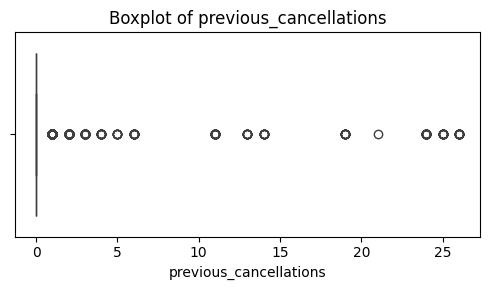

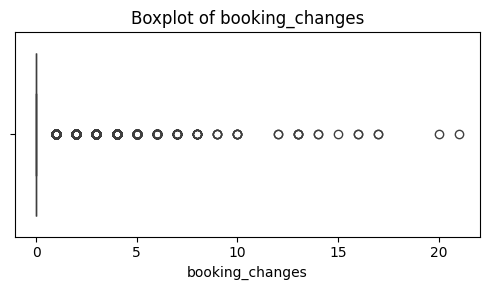

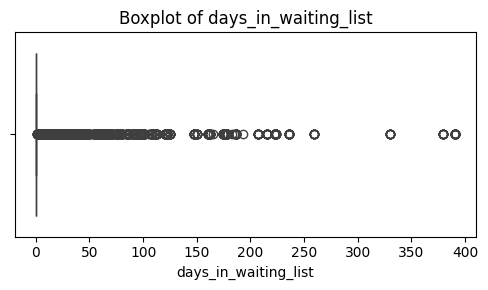

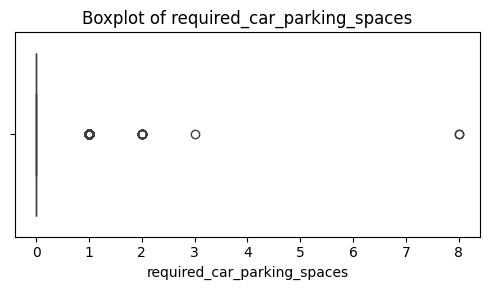

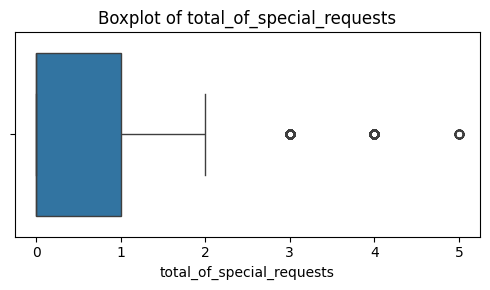

In [16]:
for col in numerical_cols_eda:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

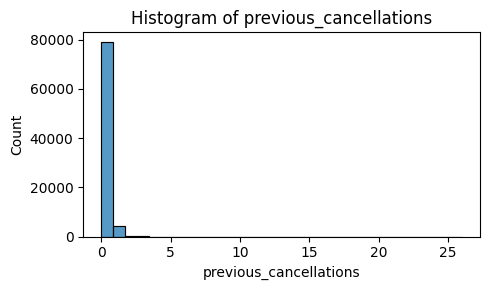

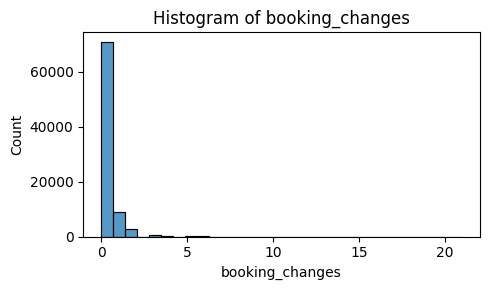

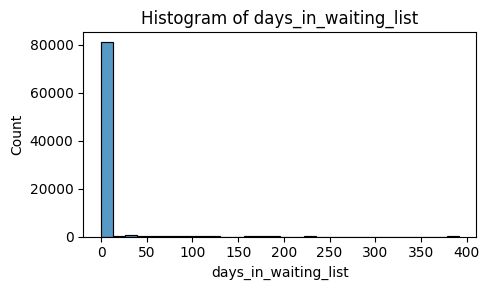

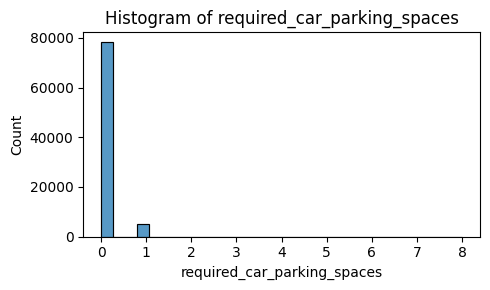

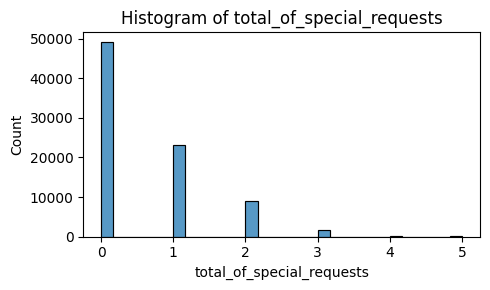

In [17]:
for col in numerical_cols_eda:
    plt.figure(figsize=(5,3))
    sns.histplot(df[col], bins=30, kde=False)
    plt.title(f'Histogram of {col}')
    plt.tight_layout()
    plt.show()

In [18]:
# NUMERICAL 1
unique_previous_cancellations = df['previous_cancellations'].unique()
print("Unique:\n", unique_previous_cancellations)

cnt_previous_cancellations = df['previous_cancellations'].value_counts()
print("\ncounts:\n", cnt_previous_cancellations)

Unique:
 [ 0  1 25  2  3 11 24 13  6 26 14  4 19  5 21]

counts:
 previous_cancellations
0     79060
1      4207
2        86
3        46
24       33
11       28
6        19
4        19
26       18
25       17
19       12
14       10
13       10
5         7
21        1
Name: count, dtype: int64


In [19]:
max_values_pc = df['previous_cancellations'].max()
min_values_pc = df['previous_cancellations'].min()
mean_values_pc = df['previous_cancellations'].mean()

print("Max:", max_values_pc)
print("Min:", min_values_pc)
print("Mean:", mean_values_pc)

Max: 26
Min: 0
Mean: 0.08679836789393704


In [20]:
# NUMERICAL 2
unique_booking_changes = df['booking_changes'].unique()
print("Unique:\n", unique_booking_changes)

cnt_booking_changes = df['booking_changes'].value_counts()
print("\ncounts:\n", cnt_booking_changes)

Unique:
 [ 0  1  2  5  3  4  6  7  9  8 17 10 13 12 14 21 16 20 15]

counts:
 booking_changes
0     70873
1      8963
2      2652
3       639
4       260
5        90
6        39
7        23
8        10
10        5
9         4
13        4
17        2
12        2
14        2
16        2
21        1
20        1
15        1
Name: count, dtype: int64


In [21]:
max_values_bc = df['booking_changes'].max()
min_values_bc = df['booking_changes'].min()
mean_values_bc = df['booking_changes'].mean()

print("Max:", max_values_bc)
print("Min:", min_values_bc)
print("Mean:", mean_values_bc)

Max: 21
Min: 0
Mean: 0.22089670108767184


In [22]:
# NUMERICAL 3
unique_days_in_waiting_list = df['days_in_waiting_list'].unique()
print("Unique:\n", unique_days_in_waiting_list)

cnt_days_in_waiting_list = df['days_in_waiting_list'].value_counts()
print("\ncounts:\n", cnt_days_in_waiting_list)

Unique:
 [  0   3  39  87  77 215  97 162  46  79   4  31 122  34  57 259  50  17
  32  43  75  69  44  22 113  58  38  65  48 236 176  25 108  91  19 160
  68  28  63  35  42  59  24   8 183 187  21 111  56  98 101  15  16  47
  93  45  14  70  10  49 178  99  60  40  85 223   6  33 391  20   1  41
 147  55  80 379 150  61 330 174 107  96  18  62  13  30 120  27 207  71
   2  76 125   5   9 224  53  83  84  12  73 100  92  23  11 105  26 193
   7 165  74 121  36  64 185]

counts:
 days_in_waiting_list
0      80988
39       166
58       104
44        93
31        93
       ...  
74         1
121        1
36         1
64         1
185        1
Name: count, Length: 115, dtype: int64


In [23]:
max_values_dwl = df['days_in_waiting_list'].max()
min_values_dwl = df['days_in_waiting_list'].min()
mean_values_dwl = df['days_in_waiting_list'].mean()

print("Max:", max_values_dwl)
print("Min:", min_values_dwl)
print("Mean:", mean_values_dwl)

Max: 391
Min: 0
Mean: 2.33056130568485


In [24]:
# NUMERICAL 4
unique_required_car_parking_spaces = df['required_car_parking_spaces'].unique()
print("Unique:\n", unique_required_car_parking_spaces)

cnt_required_car_parking_spaces = df['required_car_parking_spaces'].value_counts()
print("\ncounts:\n", cnt_required_car_parking_spaces)

Unique:
 [0 1 2 8 3]

counts:
 required_car_parking_spaces
0    78346
1     5202
2       22
8        2
3        1
Name: count, dtype: int64


In [25]:
max_values_cp = df['required_car_parking_spaces'].max()
min_values_cp = df['required_car_parking_spaces'].min()
mean_values_cp = df['required_car_parking_spaces'].mean()

print("Max:", max_values_cp)
print("Min:", min_values_cp)
print("Mean:", mean_values_cp)

Max: 8
Min: 0
Mean: 0.06299881540688979


In [26]:
# NUMERICAL 5
unique_total_of_special_requests = df['total_of_special_requests'].unique()
print("Unique:\n", unique_total_of_special_requests)

cnt_total_of_special_requests = df['total_of_special_requests'].value_counts()
print("\ncounts:\n", cnt_total_of_special_requests)

Unique:
 [0 2 1 3 4 5]

counts:
 total_of_special_requests
0    49188
1    23214
2     9120
3     1784
4      236
5       31
Name: count, dtype: int64


In [27]:
max_values_spr = df['total_of_special_requests'].max()
min_values_spr = df['total_of_special_requests'].min()
mean_values_spr = df['total_of_special_requests'].mean()

print("Max:", max_values_spr)
print("Min:", min_values_spr)
print("Mean:", mean_values_spr)

Max: 5
Min: 0
Mean: 0.5732114438873799


# Data Cleaning

In [28]:
# Check missing value
df.isna().sum()

country                        351
market_segment                   0
previous_cancellations           0
booking_changes                  0
deposit_type                     0
days_in_waiting_list             0
customer_type                    0
reserved_room_type               0
required_car_parking_spaces      0
total_of_special_requests        0
is_canceled                      0
dtype: int64

Missing countries will be replaced by Other further on.

Outlier detection has already been done above, and the decision was to keep the outliers, as they are still considered important to the analysis.

In [29]:
# Check duplicates
duplicate_count = df.duplicated().sum()
duplicate_percent = (duplicate_count / len(df)) * 100

print(f"Duplicate rows: {duplicate_count}")
print(f"Duplicate percentage: {duplicate_percent:.2f}%")

Duplicate rows: 73371
Duplicate percentage: 87.79%


Duplicate acceptable, because same booking could happen multiple times

In [30]:
df['is_canceled'].value_counts()

is_canceled
0    52795
1    30778
Name: count, dtype: int64

There is class imbalance of not cancel (book): 52795 and cancel: 30778

# Data Preprocessing & Feature Engineering

In [31]:
print(f"Missing value on country feature: {df['country'].isnull().sum()}")

Missing value on country feature: 351


In [32]:
print(f"Unique value on country feature: {df['country'].nunique()}")

Unique value on country feature: 162


The missing values in the country feature will be replaced with 'Other'. Since there are 162 unique countries, directly encoding all of them (e.g., using binary encoding) would reduce interpretability. To address this, feature engineering will be applied.

Based on the public dataset (source: https://www.sciencedirect.com/science/article/pii/S2352340918315191), the hotel is located in Portugal, so it makes sense to group guests into three categories: 

- Portugal (local tourists), 
- Non-Portugal (international tourists), and 
- Other (unknown or missing).

In [33]:
# Make just 3 types of country feature
df['country'] = np.where(df['country'].isnull() == True, 'Other', np.where(df['country'] == 'PRT', 'Portugal', 'Non Portugal'))

In [34]:
# Checking
print(df['country'].value_counts())

country
Non Portugal    49125
Portugal        34097
Other             351
Name: count, dtype: int64


In [35]:
# Rechecking
print(f"Missing value on country feature now: {df['country'].isnull().sum()}")

Missing value on country feature now: 0


# Pipeline Starts Here

In [36]:
df

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,Non Portugal,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,Non Portugal,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,Portugal,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,Non Portugal,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,Portugal,Online TA,0,2,No Deposit,0,Transient,A,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
83568,Portugal,Online TA,0,0,No Deposit,0,Contract,A,0,3,1
83569,Non Portugal,Online TA,0,0,No Deposit,0,Transient,D,0,2,0
83570,Portugal,Online TA,0,1,No Deposit,0,Transient,D,0,3,0
83571,Non Portugal,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0


In [37]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, OrdinalEncoder
from imblearn.pipeline import Pipeline as ImbPipeline

# Example pipeline structure
categorical_cols = ['country', 'customer_type', 'deposit_type', 'market_segment']
categorical_cols_ord = ['reserved_room_type']
numeric_cols = ['previous_cancellations','booking_changes','days_in_waiting_list','required_car_parking_spaces', 'total_of_special_requests']

# Feature Splitting

In [38]:
X = df.drop(['is_canceled'], axis=1)
y = df['is_canceled']

# Train-Test Splitting

70% Train, 30% Test

In [39]:
from sklearn.model_selection import train_test_split

# Split data: 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Machine Learning Models

**The Models Explained**

1. Logistic Regression

    Logistic regression is a supervised learning algorithm which is mostly used for binary classification problems. Although "regression" contradicts with "classification", the focus here is on the word "logistic" referring to logistic function which does the classification task in this algorithm. Logistic regression is a simple yet very effective classification algorithm so it is commonly used for many binary classification tasks. Customer churn, spam email, website or ad click predictions are some examples of the areas where logistic regression offers a powerful solution.

    The basis of logistic regression is the logistic function, also called the sigmoid function, which takes in any real valued number and maps it to a value between 0 and 1.

    <img src="https://towardsdatascience.com/wp-content/uploads/2020/02/1kdnGMCPik_GJITfPRI35DA.png">

    Source: https://towardsdatascience.com/logistic-regression-explained-593e9ddb7c6c/

2. Decision Tree

    Decision trees are preferred for many applications, mainly due to their high explainability, but also due to the fact that they are relatively simple to set up and train, and the short time it takes to perform a prediction with a decision tree. Decision trees are natural to tabular data, and, in fact, they currently seem to outperform neural networks on that type of data (as opposed to images). Unlike neural networks, trees don’t require input normalization, since their training is not based on gradient descent and they have very few parameters to optimize on. They can even train on data with missing values, but nowadays this practice is less recommended, and missing values are usually imputed.

    Among the well-known use-cases for decision trees are recommendation systems (what are your predicted movie preferences based on your past choices and other features, e.g. age, gender etc.) and search engines.

    <img src="https://towardsdatascience.com/wp-content/uploads/2022/05/1oUzKoJLSobKLwxGwXXxtYg.png">

    Source: https://towardsdatascience.com/decision-trees-explained-d7678c43a59e/

3. Random Forest

   A Random Forest is an ensemble machine learning model that combines multiple decision trees. Each tree in the forest is trained on a random sample of the data (bootstrap sampling) and considers only a random subset of features when making splits (feature randomization).

    For classification tasks, the forest predicts by majority voting among trees, while for regression tasks, it averages the predictions. The model’s strength comes from its "wisdom of crowds" approach – while individual trees might make errors, the collective decision-making process tends to average out these mistakes and arrive at more reliable predictions.

    <img src="https://towardsdatascience.com/wp-content/uploads/2024/11/1FisK9hkTkWP2D92ANxAp9w-2048x2043.png">

    Source: https://towardsdatascience.com/random-forest-explained-a-visual-guide-with-code-examples-9f736a6e1b3c/

4. AdaBoost

    AdaBoost is an ensemble machine learning model that creates a sequence of weighted decision trees, typically using shallow trees (often just single-level "stumps"). Each tree is trained on the entire dataset, but with adaptive sample weights that give more importance to previously misclassified examples.

    For classification tasks, AdaBoost combines the trees through a weighted voting system, where better-performing trees get more influence in the final decision.

    The model’s strength comes from its adaptive learning process – while each simple tree might be a "weak learner" that performs only slightly better than random guessing, the weighted combination of trees creates a "strong learner" that progressively focuses on and corrects mistakes.

    <img src="https://towardsdatascience.com/wp-content/uploads/2024/11/1HImcqWdiiQnr84PBGWjf5Q-964x1024.png">

    Source: https://towardsdatascience.com/adaboost-classifier-explained-a-visual-guide-with-code-examples-fc0f25326d7b/

5. Gradient Boosting (GBM)

   Gradient boosting is one of the most popular machine learning algorithms for tabular datasets. It is powerful enough to find any nonlinear relationship between your model target and features and has great usability that can deal with missing values, outliers, and high cardinality categorical values on your features without any special treatment. While you can build barebone gradient boosting trees using some popular libraries such as XGBoost or LightGBM without knowing any details of the algorithm, you still want to know how it works when you start tuning hyper-parameters, customizing the loss functions, etc., to get better quality on your model.

    <img src="https://towardsdatascience.com/wp-content/uploads/2022/01/132xSZb7FIIxwFQeq9MKCgQ.png">

    Source: https://towardsdatascience.com/all-you-need-to-know-about-gradient-boosting-algorithm-part-1-regression-2520a34a502/

6. Light GBM

    Light GBM (Light Gradient Boosting Machine) is a machine learning framework built around the gradient boosting technique. It is intended for efficient and distributed training, making it especially suitable for huge datasets and high-dimensional data. Light GBM is notable for its speed, memory efficiency, and scalability, which are achieved via novel techniques like a histogram-based approach to feature binning and splitting.

    Microsoft developed Light GBM, which is an open-source project. It was originally released in 2016. Light GBM was developed in response to the demand for a very efficient and scalable gradient boosting framework.

    <img src="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*7XXMAN4W0ERC279fnA4MnQ.png">

    Source: https://medium.com/@venkatyogesh003/unveiling-the-power-of-light-gbm-e3b46743a2b2

7. XGBoost

   XGBoost (eXtreme Gradient Boosting) is a distributed, open-source machine learning library that uses gradient boosted decision trees, a supervised learning boosting algorithm that makes use of gradient descent. It is known for its speed, efficiency and ability to scale well with large datasets.

    Developed by Tianqi Chen from the University of Washington, XGBoost is an advanced implementation of gradient boosting with the same general framework; that is, it combines weak learner trees into strong learners by adding up residuals.

    Source: https://www.ibm.com/think/topics/xgboost#:~:text=XGBoost%20(eXtreme%20Gradient%20Boosting)%20is,scale%20well%20with%20large%20datasets.

# Running Model

In [40]:
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, fbeta_score

import warnings
warnings.filterwarnings('ignore')

**Notes:**

In this case, we prioritize models with **high recall and F2 score**, since both emphasize capturing cancellations effectively. This focus aligns well with the goal of predicting hotel booking cancellations, where identifying as many cancellations as possible is more important than precision.

In [41]:
# Define preprocessors
cat_ohe = OneHotEncoder(handle_unknown='ignore')
cat_ord = Pipeline([
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])
num_scaler = RobustScaler()

# Full ColumnTransformer
preprocessor = ColumnTransformer([
    ('cat', cat_ohe, categorical_cols),
    ('cat2', cat_ord, categorical_cols_ord),
    ('num', num_scaler, numeric_cols)
])


### RobustScaled only

In [42]:
# Define custom F2 scorer
f2_scorer_scaled = make_scorer(fbeta_score, beta=2, average='binary')

models = {
    'logreg': LogisticRegression(max_iter=1000),
    'dt': DecisionTreeClassifier(),
    'rf': RandomForestClassifier(),
    'adaboost': AdaBoostClassifier(),
    'gboost': GradientBoostingClassifier(),
    'lgbm': LGBMClassifier(),
    'xgb': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Create pipelines for each model
pipelines_scaled = {}
for name, model in models.items():
    pipelines_scaled[name] = ImbPipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

# full_pipeline_rs = ImbPipeline([
#     ('preprocessor', preprocessor),
#     ('model', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
# ])

# full_pipeline_rs.fit(X_train, y_train)

In [43]:
from sklearn.model_selection import cross_val_score

# Initialize empty list to store results
model_scores = []

# Loop through pipelines and calculate F2 score
for name, pipe in pipelines_scaled.items():
    scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring=f2_scorer_scaled)
    avg_score = scores.mean()
    model_scores.append({'Model': name.upper(), 'F2 Score': avg_score})

# Convert to DataFrame
df_model_scores = pd.DataFrame(model_scores).sort_values(by='F2 Score', ascending=False)

[LightGBM] [Info] Number of positive: 17236, number of negative: 29564
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005123 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 170
[LightGBM] [Info] Number of data points in the train set: 46800, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.368291 -> initscore=-0.539557
[LightGBM] [Info] Start training from score -0.539557
[LightGBM] [Info] Number of positive: 17236, number of negative: 29565
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003815 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 165
[LightGBM] [Info] Number of data points in the train set: 46801, number of used features: 23
[LightGBM] [Info] [b

In [44]:
# Display the DataFrame
print(df_model_scores)

      Model  F2 Score
2        RF  0.718046
1        DT  0.715859
6       XGB  0.711441
5      LGBM  0.710159
4    GBOOST  0.679695
0    LOGREG  0.574886
3  ADABOOST  0.516290


In [45]:
top3_models = df_model_scores.head(3)
print(f"Top 3 Model (RobustScaled):\n\n{top3_models}")

Top 3 Model (RobustScaled):

  Model  F2 Score
2    RF  0.718046
1    DT  0.715859
6   XGB  0.711441


### RobustScaled + SMOTE

In [46]:
from imblearn.over_sampling import SMOTE

# Define custom F2 scorer
f2_scorer_sc_smote = make_scorer(fbeta_score, beta=2, average='binary')

# Define models
models = {
    'logreg': LogisticRegression(max_iter=1000),
    'dt': DecisionTreeClassifier(),
    'rf': RandomForestClassifier(),
    'adaboost': AdaBoostClassifier(),
    'gboost': GradientBoostingClassifier(),
    'lgbm': LGBMClassifier(),
    'xgb': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Create pipelines for each model
pipelines_sc_smote = {}
for name, model in models.items():
    pipelines_sc_smote[name] = Pipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('model', model)
    ])

In [47]:
# Initialize empty list to store results
model_scores2 = []

# Loop through pipelines and calculate F2 score
for name, pipe in pipelines_sc_smote.items():
    scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring=f2_scorer_sc_smote)
    avg_score = scores.mean()
    model_scores2.append({'Model': name.upper(), 'F2 Score': avg_score})

# Convert to DataFrame
df_model_scores2 = pd.DataFrame(model_scores2).sort_values(by='F2 Score', ascending=False)

[LightGBM] [Info] Number of positive: 29564, number of negative: 29564
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005005 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 421
[LightGBM] [Info] Number of data points in the train set: 59128, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 29565, number of negative: 29565
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005124 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 400
[LightGBM] [Info] Number of data points in the train set: 59130, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000

In [48]:
# Display the DataFrame
print(df_model_scores2)

      Model  F2 Score
5      LGBM  0.757273
6       XGB  0.757118
2        RF  0.755851
1        DT  0.754352
4    GBOOST  0.754212
0    LOGREG  0.732503
3  ADABOOST  0.687408


In [49]:
top3_models2 = df_model_scores2.head(3)
print(f"Top 3 Model (RobustScaled, SMOTE):\n\n{top3_models2}")

Top 3 Model (RobustScaled, SMOTE):

  Model  F2 Score
5  LGBM  0.757273
6   XGB  0.757118
2    RF  0.755851


# Hyperparameter Tuning

### RobustScaled + SMOTE + Tuning

#### LightGBM Tuned

In [50]:
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# from sklearn.metrics import make_scorer, fbeta_score

# full_pipeline_lgbm_tuned = ImbPipeline([
#     ('preprocessor', preprocessor),
#     ('smote', SMOTE(random_state=42)),
#     ('model', LGBMClassifier(random_state=42))
# ])

# # Define hyperparameter grid
# param_grid_lgbm = {
#     'model__n_estimators': [100, 200, 300],
#     'model__learning_rate': [0.01, 0.05, 0.1],
#     'model__max_depth': [3, 5, 7],
#     'model__num_leaves': [15, 31, 50, 100],
#     'model__min_child_samples': [10, 20, 30],
#     'model__subsample': [0.6, 0.8, 1.0],
#     'model__colsample_bytree': [0.6, 0.8, 1.0],
#     'model__reg_alpha': [0, 0.1, 1],
#     'model__reg_lambda': [0, 0.1, 1]
#     }

# # Define F2 scorer
# f2_scorer_lgbm = make_scorer(fbeta_score, beta=2)

# lgbm_tuned = RandomizedSearchCV(estimator= full_pipeline_lgbm_tuned,
#     param_distributions= param_grid_lgbm, cv= 5, scoring= f2_scorer_lgbm,
#     n_jobs= -1, n_iter= 100, random_state= 42)

# lgbm_tuned.fit(X_train, y_train)

In [51]:
# y_pred_lgbm = lgbm_tuned.predict(X_test)

# lgbm_tuned.best_params_

In [52]:
# print(lgbm_tuned.best_score_)

LGBM Tuned Parameters

In [53]:
from sklearn.metrics import fbeta_score

# Create pipeline with tuned params
lgbm_tuned = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', LGBMClassifier(
        subsample=0.8,
        reg_lambda=0,
        reg_alpha=1,
        num_leaves=15,
        n_estimators=300,
        min_child_samples=10,
        max_depth=5,
        learning_rate=0.1,
        colsample_bytree=0.8,
        random_state=42
    ))
])

# Fit to training data
lgbm_tuned.fit(X_train, y_train)

# Predict on test set
y_pred_lgbm = lgbm_tuned.predict(X_test)

[LightGBM] [Info] Number of positive: 36956, number of negative: 36956
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 430
[LightGBM] [Info] Number of data points in the train set: 73912, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

In [54]:
# Evaluate F2 score
f2_lgbm_tuned = fbeta_score(y_test, y_pred_lgbm, beta=2)
f2_lgbm_tuned

0.7533676323036527

##### XGB Tuned

In [55]:
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# from sklearn.metrics import make_scorer, fbeta_score

# full_pipeline_xgb_tuned = ImbPipeline([
#     ('preprocessor', preprocessor),
#     ('smote', SMOTE(random_state=42)),
#     ('model', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
# ])

# # Define hyperparameter grid
# param_grid_xgb = {
#     'model__n_estimators': [100, 200, 300],
#     'model__max_depth': [3, 5, 7, 10],
#     'model__learning_rate': [0.01, 0.1, 0.2],
#     'model__subsample': [0.6, 0.8, 1.0],
#     'model__colsample_bytree': [0.6, 0.8, 1.0],
#     'model__gamma': [0, 1, 5],
#     'model__min_child_weight': [1, 5, 10]
#     }

# # Define F2 scorer
# f2_scorer_xgb = make_scorer(fbeta_score, beta=2)

# xgb_tuned = RandomizedSearchCV(estimator= full_pipeline_xgb_tuned,
#     param_distributions= param_grid_xgb, cv= 5, scoring= f2_scorer_xgb,
#     n_jobs= -1, n_iter= 100, random_state= 42)

# xgb_tuned.fit(X_train, y_train)

In [56]:
# y_pred_xgb = xgb_tuned.predict(X_test)

# xgb_tuned.best_params_

In [57]:
# print(xgb_tuned.best_score_)

XGB Tuned Parameters

In [58]:
# Create pipeline with tuned params
xgb_tuned = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', XGBClassifier(
        subsample= 0.6,
        n_estimators= 200,
        min_child_weight= 5,
        max_depth= 5,
        learning_rate= 0.1,
        gamma= 1,
        colsample_bytree= 1.0
    ))
])

# Fit to training data
xgb_tuned.fit(X_train, y_train)

# Predict on test set
y_pred_xgb = xgb_tuned.predict(X_test)

In [59]:
# Evaluate F2 score
f2_xgb_tuned = fbeta_score(y_test, y_pred_xgb, beta=2)
f2_xgb_tuned

0.7533135551618894

#### Random Forest Tuned

In [60]:
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# from sklearn.metrics import make_scorer, fbeta_score

# full_pipeline_rf_tuned = ImbPipeline([
#     ('preprocessor', preprocessor),
#     ('smote', SMOTE(random_state=42)),
#     ('model', RandomForestClassifier(random_state=42))
# ])

# # Define hyperparameter grid
# param_grid_rf = {
#     'model__max_depth': [10, 20, None],
#     'model__min_samples_split': [2, 5],
#     'model__n_estimators': [100, 200],
#     'model__criterion': ['gini', 'entropy'],
#     'model__class_weight': ['balanced', 'balanced_subsample', None],
#     'model__min_samples_leaf': [1, 2]
#     }

# # Define F2 scorer
# f2_scorer_rf = make_scorer(fbeta_score, beta=2)

# rf_tuned = RandomizedSearchCV(estimator= full_pipeline_rf_tuned,
#     param_distributions= param_grid_rf, cv= 5, scoring= f2_scorer_rf,
#     n_jobs= -1, n_iter= 100, random_state= 42)

# rf_tuned.fit(X_train, y_train)

In [61]:
# y_pred_rf = rf_tuned.predict(X_test)

# rf_tuned.best_params_

In [62]:
# print(rf_tuned.best_score_)

RF Tuned Parameters

In [63]:
# Create pipeline with tuned params
rf_tuned = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(
        n_estimators= 100,
        min_samples_split= 5,
        min_samples_leaf= 2,
        max_depth= 20,
        criterion= 'gini',
        class_weight= None
    ))
])

# Fit to training data
rf_tuned.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_tuned.predict(X_test)

In [64]:
# Evaluate F2 score
f2_rf_tuned = fbeta_score(y_test, y_pred_rf, beta=2)
f2_rf_tuned

0.7540808705857249

# All F2 Score Summary

In [65]:
# Collect results in a list of dictionaries
model_scores_all3 = [
    {'Model': 'Random Forest', 
     'F2_scaled':df_model_scores.loc[df_model_scores['Model'] == 'RF', 'F2 Score'].values[0],
     'F2_smote':df_model_scores2.loc[df_model_scores2['Model'] == 'RF', 'F2 Score'].values[0], 
    #  'F2_Tuned': rf_tuned.best_score_}, #if running RandomizedSearch
     'F2_Tuned': f2_rf_tuned},
    {'Model': 'XGBoost', 
     'F2_scaled':df_model_scores.loc[df_model_scores['Model'] == 'XGB', 'F2 Score'].values[0],
     'F2_smote':df_model_scores2.loc[df_model_scores2['Model'] == 'XGB', 'F2 Score'].values[0],
    #  'F2_Tuned': xgb_tuned.best_score_}, #if running RandomizedSearch
     'F2_Tuned': f2_xgb_tuned},
    {'Model': 'LightGBM',
     'F2_scaled':df_model_scores.loc[df_model_scores['Model'] == 'LGBM', 'F2 Score'].values[0],
     'F2_smote':df_model_scores2.loc[df_model_scores2['Model'] == 'LGBM', 'F2 Score'].values[0],
    #  'F2_Tuned': lgbm_tuned.best_score_}, #if running RandomizedSearch
     'F2_Tuned': f2_lgbm_tuned}
]

# Convert to DataFrame
df_best_scores_all3 = pd.DataFrame(model_scores_all3).sort_values(by='F2_Tuned', ascending=False)

# Display
print("Top 3 Model (RobustScaled, SMOTE, Tuned):\n")
print(df_best_scores_all3)


Top 3 Model (RobustScaled, SMOTE, Tuned):

           Model  F2_scaled  F2_smote  F2_Tuned
0  Random Forest   0.718046  0.755851  0.754081
2       LightGBM   0.710159  0.757273  0.753368
1        XGBoost   0.711441  0.757118  0.753314


Although the F2 scores from the SMOTE pipeline and the tuned models differ only slightly (within ~0.003), **I choose to proceed with the tuned model results** because:
- **Measurability:** Tuned models use explicitly defined hyperparameters, making performance reproducible and measurable across different runs or datasets.
- **Repeatability:** By fixing the best parameters, the model’s behavior is stable and consistent, which is important for deployment or future updates.
- **Optimization Confidence:** The tuned model reflects the best possible configuration discovered via cross-validation, ensuring the model is not just lucky on one specific split of data.

While I choose more into **XGBoost** vs LightGBM because of its greater model stability, interpretation clarity, and deployment maturity. Suits best for reducing FN in booking cancellation risk.

Thus, even with slightly lower raw F2, **the tuned model of XGBoost is more trustworthy for long-term use.**

### Check ROC AUC

In [66]:
from sklearn.metrics import roc_auc_score

# pipelines_sc_smote['rf'].fit(X_train, y_train)
# pipelines_sc_smote['xgb'].fit(X_train, y_train)
# pipelines_sc_smote['dt'].fit(X_train, y_train)

# Predict probabilities for class 1 (canceled)
y_proba_rf = rf_tuned.predict_proba(X_test)[:, 1]
y_proba_xgb = xgb_tuned.predict_proba(X_test)[:, 1]
y_proba_lgbm = lgbm_tuned.predict_proba(X_test)[:, 1]

# Compute ROC AUC
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
roc_auc_xgb = roc_auc_score(y_test, y_proba_xgb)
roc_auc_lgbm = roc_auc_score(y_test, y_proba_lgbm)

In [67]:
# Collect results in a list of dictionaries
roc_auc_all3 = [
    {'Model': 'Random Forest', 
     'ROC AUC':roc_auc_rf},
    {'Model': 'XGBoost', 
     'ROC AUC':roc_auc_xgb},
    {'Model': 'LightGBM',
     'ROC AUC':roc_auc_lgbm}
]

# Convert to DataFrame
df_roc_auc_all3 = pd.DataFrame(roc_auc_all3).sort_values(by='ROC AUC', ascending=False)

# Display
print("Top 3 ROC AUC Model (RobustScaled, SMOTE):\n")
print(df_roc_auc_all3)


Top 3 ROC AUC Model (RobustScaled, SMOTE):

           Model   ROC AUC
2       LightGBM  0.888685
0  Random Forest  0.888328
1        XGBoost  0.888042


### Check Recall via Confusion Matrix

##### Random Forest

In [68]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Example for 'rf' model in your pipeline dict
model_cm_rf = rf_tuned
model_cm_rf.fit(X_train, y_train)  # make sure it's fitted

y_pred_cm_rf = model_cm_rf.predict(X_test)

In [69]:
from sklearn.metrics import classification_report

# Print report
print(classification_report(y_test, y_pred_cm_rf, target_names=['Not Canceled', 'Canceled']))

              precision    recall  f1-score   support

Not Canceled       0.86      0.82      0.84     15839
    Canceled       0.71      0.76      0.74      9233

    accuracy                           0.80     25072
   macro avg       0.78      0.79      0.79     25072
weighted avg       0.80      0.80      0.80     25072



<Figure size 400x300 with 0 Axes>

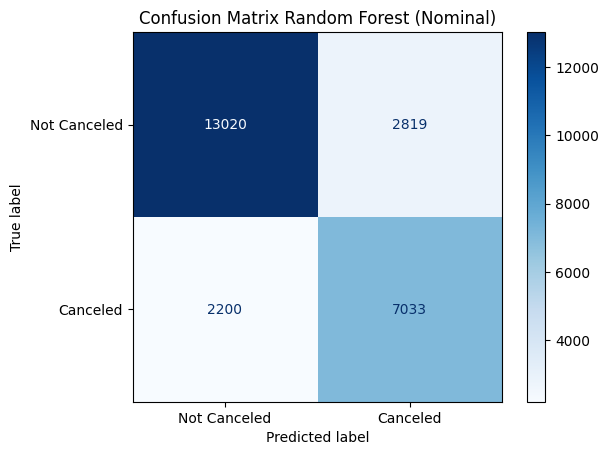

In [70]:
cm_nominal_rf = confusion_matrix(y_test, y_pred_cm_rf)
disp_nominal_rf = ConfusionMatrixDisplay(confusion_matrix=cm_nominal_rf, display_labels=['Not Canceled', 'Canceled'])

plt.figure(figsize=(4,3))
disp_nominal_rf.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix Random Forest (Nominal)")
plt.show()


<Figure size 400x300 with 0 Axes>

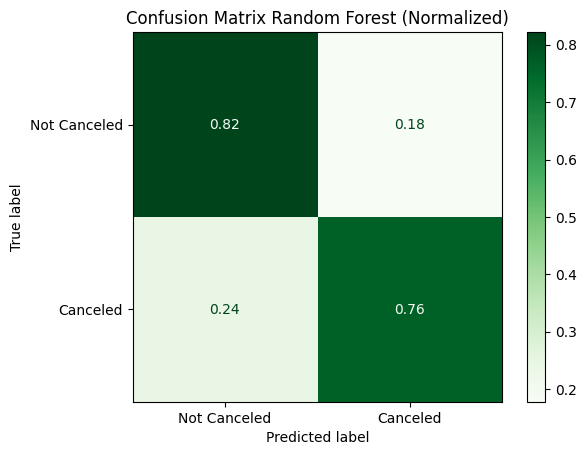

In [71]:
cm_normalized_rf = confusion_matrix(y_test, y_pred_cm_rf, normalize='true')
disp_normalized_rf = ConfusionMatrixDisplay(confusion_matrix=cm_normalized_rf, display_labels=['Not Canceled', 'Canceled'])

plt.figure(figsize=(4,3))
disp_normalized_rf.plot(cmap='Greens', values_format='.2f')
plt.title("Confusion Matrix Random Forest (Normalized)")
plt.show()


#### XGBoost

In [72]:
model_cm_xgb = xgb_tuned
model_cm_xgb.fit(X_train, y_train)  # make sure it's fitted

y_pred_cm_xgb = model_cm_xgb.predict(X_test)

In [73]:
print(classification_report(y_test, y_pred_cm_xgb, target_names=['Not Canceled', 'Canceled']))

              precision    recall  f1-score   support

Not Canceled       0.86      0.82      0.84     15839
    Canceled       0.71      0.76      0.74      9233

    accuracy                           0.80     25072
   macro avg       0.78      0.79      0.79     25072
weighted avg       0.80      0.80      0.80     25072



<Figure size 400x300 with 0 Axes>

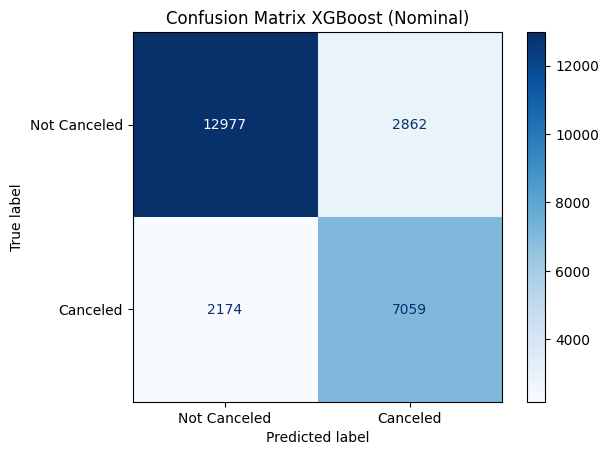

In [74]:
cm_nominal_xgb = confusion_matrix(y_test, y_pred_cm_xgb)
disp_nominal_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_nominal_xgb, display_labels=['Not Canceled', 'Canceled'])

plt.figure(figsize=(4,3))
disp_nominal_xgb.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix XGBoost (Nominal)")
plt.show()


<Figure size 400x300 with 0 Axes>

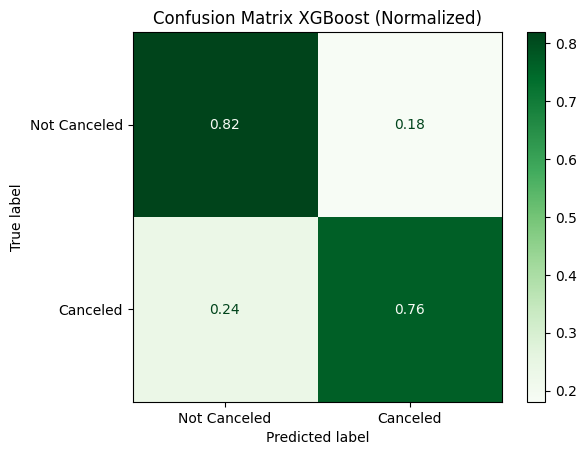

In [75]:
cm_normalized_xgb = confusion_matrix(y_test, y_pred_cm_xgb, normalize='true')
disp_normalized_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_normalized_xgb, display_labels=['Not Canceled', 'Canceled'])

plt.figure(figsize=(4,3))
disp_normalized_xgb.plot(cmap='Greens', values_format='.2f')
plt.title("Confusion Matrix XGBoost (Normalized)")
plt.show()


#### LightGBM

In [76]:
model_cm_lgbm = lgbm_tuned
model_cm_lgbm.fit(X_train, y_train)  # make sure it's fitted

y_pred_cm_lgbm = model_cm_lgbm.predict(X_test)

[LightGBM] [Info] Number of positive: 36956, number of negative: 36956
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 430
[LightGBM] [Info] Number of data points in the train set: 73912, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

In [77]:
print(classification_report(y_test, y_pred_cm_lgbm, target_names=['Not Canceled', 'Canceled']))

              precision    recall  f1-score   support

Not Canceled       0.86      0.82      0.84     15839
    Canceled       0.71      0.76      0.74      9233

    accuracy                           0.80     25072
   macro avg       0.78      0.79      0.79     25072
weighted avg       0.80      0.80      0.80     25072



<Figure size 500x400 with 0 Axes>

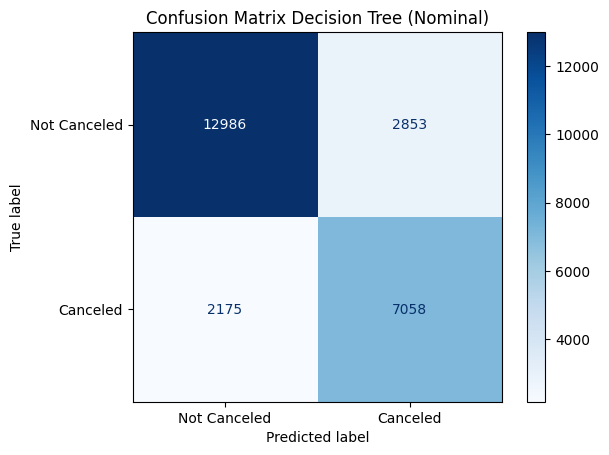

In [78]:
cm_nominal_dt = confusion_matrix(y_test, y_pred_cm_lgbm)
disp_nominal_dt = ConfusionMatrixDisplay(confusion_matrix=cm_nominal_dt, display_labels=['Not Canceled', 'Canceled'])

plt.figure(figsize=(5, 4))
disp_nominal_dt.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix Decision Tree (Nominal)")
plt.show()


<Figure size 500x400 with 0 Axes>

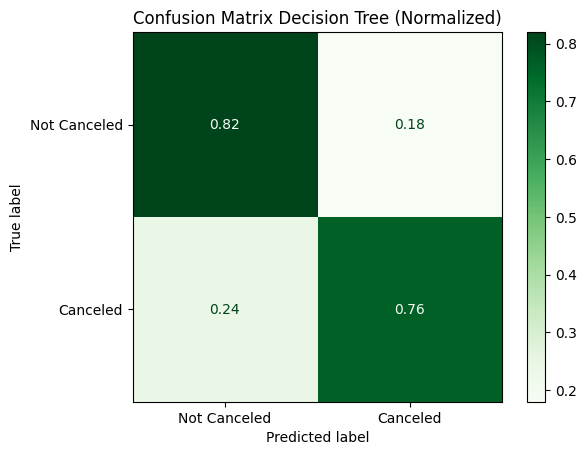

In [79]:
cm_normalized_dt = confusion_matrix(y_test, y_pred_cm_lgbm, normalize='true')
disp_normalized_dt = ConfusionMatrixDisplay(confusion_matrix=cm_normalized_dt, display_labels=['Not Canceled', 'Canceled'])

plt.figure(figsize=(5, 4))
disp_normalized_dt.plot(cmap='Greens', values_format='.2f')
plt.title("Confusion Matrix Decision Tree (Normalized)")
plt.show()


# Model Summary

In [80]:
from sklearn.metrics import recall_score

recall_rf = recall_score(y_test, y_pred_cm_rf)
recall_xgb = recall_score(y_test, y_pred_cm_xgb)
recall_dt = recall_score(y_test, y_pred_cm_lgbm)

model_summary_all3 = [
    {'Model': 'Random Forest', 
     'F2 score':f2_rf_tuned, 
     'ROC AUC': roc_auc_rf,
     'Recall': recall_rf},
    {'Model': 'XGBoost', 
     'F2 score':f2_xgb_tuned,
     'ROC AUC': roc_auc_xgb,
     'Recall': recall_xgb
     },
    {'Model': 'LightGBM',
     'F2 score':f2_lgbm_tuned,
     'ROC AUC': roc_auc_lgbm,
     'Recall': recall_dt
     }
]

# Convert to DataFrame
df_model_summary_all3 = pd.DataFrame(model_summary_all3).sort_values(by='F2 score', ascending=False)

# Display
print("Top 3 Model (RobustScaled, SMOTE, Tuned), ROC AUC, and Recall:\n")
print(df_model_summary_all3)


Top 3 Model (RobustScaled, SMOTE, Tuned), ROC AUC, and Recall:

           Model  F2 score   ROC AUC    Recall
0  Random Forest  0.754081  0.888328  0.761724
2       LightGBM  0.753368  0.888685  0.764432
1        XGBoost  0.753314  0.888042  0.764540


Even though F2 is slightly lower than LightGBM, recall is marginally better, and **XGBoost** offers greater model stability, interpretation clarity, and deployment maturity, making it a safer and more robust choice for real-world implementation, especially when avoiding false negatives (FN) is critical.

# Feature Importance

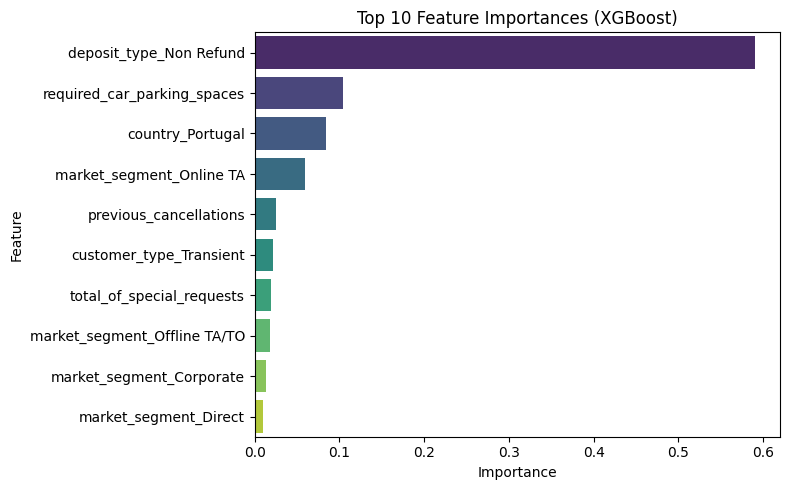

In [81]:
final_model = xgb_tuned

# Access preprocessor from the trained pipeline
preprocessor = final_model.named_steps['preprocessor']

# Get feature names from each transformer
ohe_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
ord_features = categorical_cols_ord
num_features = numeric_cols

# Combine all features in the correct order
all_features = list(ohe_features) + ord_features + num_features

# Check length matches feature importances
importances = final_model.named_steps['model'].feature_importances_
assert len(all_features) == len(importances), "Feature count mismatch!"

# Create DataFrame
fi_df = pd.DataFrame({'Feature': all_features, 'Importance': importances})
fi_df = fi_df.sort_values(by='Importance', ascending=False)

# Plot Top 10
plt.figure(figsize=(8, 5))
sns.barplot(data=fi_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Feature Importances (XGBoost)')
plt.tight_layout()
plt.show()


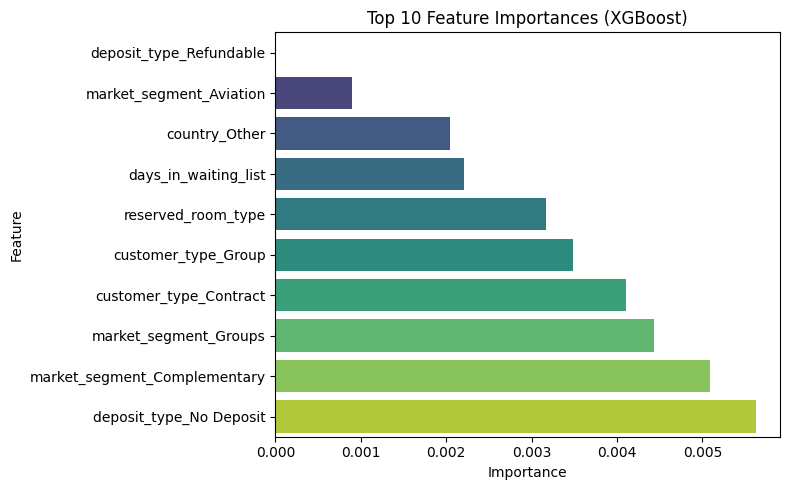

In [82]:
fi_df = fi_df.sort_values(by='Importance', ascending=True)

# Plot Top 10
plt.figure(figsize=(8, 5))
sns.barplot(data=fi_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Feature Importances (XGBoost)')
plt.tight_layout()
plt.show()

According to the XGBoost model using RobustScaler and SMOTE, the top 3 factors linked to booking cancellations are:
1. deposit_type_Non Refund (Non-refundable deposit)
2. required_car_parking_spaces (Requested a car parking space)
3. country_Portugal (Guest is from Portugal)

On the other hand, the 3 least likely factors associated with cancellations are:
1. deposit_type_No Deposit (No deposit required)
2. market_segment_Complementary (free stay)
3. country_No Portugal (Guest is not from Portugal)

# Save it to Pickle

In [83]:
# # Save the entire pipeline
# import pickle
# with open('XGB_Tuned_pipeline.pkl', 'wb') as f:
#     pickle.dump(xgb_tuned, f)

# Model Implementation

### Cost and Business Context



**Target Stakeholders:** Hotel owners and management teams  

**When to Use:** This model is designed for times when hotel management needs to plan overbooking strategies, especially during **peak seasons, holidays, or specific dates** that require careful **cost and cancellation prediction**.


Assumptions and Model Impact Analysis

To evaluate the impact of having or not having a booking cancellation prediction model, we compare three scenarios using the defined cost structure:

**Cost Assumptions per Booking:**

- True Book (Predicted Book, Actual Book): +150 USD
- False Book (Predicted Book, Actual Cancel): –50 USD
- False Cancel (Predicted Cancel, Actual Book): –200 USD
- True Cancel (Predicted Cancel, Actual Cancel): +100 USD

**Scenario 1 – Worst Case**
- Assumption: 200 actual bookings, model predicts 100 book / 100 cancel

| | Predicted Book | Predicted Cancel | 
|---|---|---|
| Actual Book | 100 × 150 USD | 100 × (–200 USD) | 
| Actual Cancel | 0 × (–50 USD) | 0 × 100 USD | 

Estimated income:

= (100 × 150) – (100 × 200)
= 15,000 – 20,000
= –5,000 USD

**Scenario 2 – Ideal Case**

- Assumption: 100 actual book, 100 actual cancel; prediction matches perfectly

|  | Predicted Book | Predicted Cancel | 
|---|---|---|
| Actual Book | 100 × 150 USD | 0 × (–200 USD) | 
| Actual Cancel | 0 × (–50 USD) | 100 × 100 USD | 


Estimated income:

= (100 × 150) + (100 × 100)
= 15,000 + 10,000
= 25,000 USD

**Scenario 3 – Based on Your Model**

|  | Predicted Book | Predicted Cancel | 
|---|---|---|
| Actual Book | 82 × 150 USD | 18 × (–200 USD) | 
| Actual Cancel | 23 × (–50 USD) | 77 × 100 USD | 

Estimated income:

= (82 × 150) – (18 × 200) – (23 × 50) + (77 × 100)

= 12,300 – 3,600 – 1,150 + 7,700
= 15,250 USD

**Recall Balance Sensitivity – Scenario A**

Recall 0 = 83, Recall 1 = 76

Income = (83 × 150) – (17 × 200) – (22 × 50) + (76 × 100)

= 12,450 – 3,400 – 1,100 + 7,600
= 15,550 USD

**Recall Balance Sensitivity – Scenario B (Extreme)**

Recall 0 = 100, Recall 1 = 59

Income = (100 × 150) – (0 × 200) – (41 × 50) + (59 × 100)

= 15,000 – 0 – 2,050 + 5,900
= 18,850 USD

**Insight**

Maximizing recall for non-cancellations (class 0) significantly boosts income. Despite our original goal of detecting cancellations, this result aligns with research suggesting that lost revenue from vacant rooms is often higher than losses from overbooking. So, this model needs to balance financial gain with its predictive purpose.


# Conclusion

The model used is **XGBoost combined with RobustScaler and SMOTE resampling.** The XGBoost classifier was fine-tuned with the following parameters:

XGBClassifier(
- 'xgb__subsample': 0.6,
- 'xgb__n_estimators': 200,
- 'xgb__min_child_weight': 5,
- 'xgb__max_depth': 5,
- 'xgb__learning_rate': 0.1,
- 'xgb__gamma': 1,
- 'xgb__colsample_bytree': 1.0)

**Model Performance**

- Precision = 0.71, the model correctly identifies 71% of the bookings it predicts as canceled.
- Recall = 0.77, out of 100 actual cancellations, the model successfully detects 77 of them.
- False Positive Rate = 22%, that 22% of actual cancellations were missed (predicted as not canceled).
- False Negative Rate = 19%, that 19% of bookings predicted as cancellations were actually not canceled.

**Model Limitation**

While the model gives relatively strong predictions, interpretability is a challenge due to the nature of ensemble methods. Hyperparameter tuning also took a long time and gave only minor performance improvement. This can be improved by using randomized search or reducing the parameter search space.

**Note on Imbalanced Data**

For imbalanced datasets, it's important to apply stratified sampling during train-test splitting and cross-validation. Avoid using accuracy as a performance metric, as it can be misleading in such cases.


# Further Analysis & Recommendation

Recommendations to Improve Model Performance and Project Exploration
1. Expand and Balance the Dataset

Especially in cases with imbalanced targets, it would be beneficial to collect more canceled booking data so it’s more balanced with non-cancelled bookings.

2. Add Potentially Useful Features

Public datasets on Kaggle include additional features not present in the current dataset—like Average Daily Rate (ADR), number of days between booking and arrival, or even date-related features that could be used for time-series cancellation prediction.

3. Experiment with Different Combinations

Explore various setups involving feature selection, engineering, resampling, and modeling:
   - Try RFE (Recursive Feature Elimination) for feature selection
   - Perform feature engineering beyond the country column
   - Use different resampling methods like ADASYN or SMOTE variants
   - Test different models, such as Naive Bayes or CatBoost

4. Refine Business Impact Calculations

Evaluate the cost difference between vacant rooms and overbookings more thoroughly. So far, results suggest it's more cost-effective to penalize missed bookings (empty rooms) than to focus solely on overbook prevention—supporting the strategy of predicting cancellations to reduce vacancy loss.
